# Chapter 7. 연습문제 정답

iris 데이터 셋을 이용해 Keras 패키지로 딥 러닝 실습을 해보도록 하겠습니다. 4가지 독립변수를 이용해 species(품종)를 95% 이상의 정확도로 예측하는 분류 모델을 만드는 것이 목적입니다.

#### 1. 먼저 iris 데이터 셋의 독립변수인 1~4열까지는 Min-Max Scale을 실시하고, 마지막 열인 species를 One-Hot Encoding 해 보세요.
(힌트) sklearn.preprocessing 모듈에서 스케일 변환과 One-Hot Encoding 모두를 할 수 있습니다.


In [1]:
import seaborn as sns
import pandas as pd
iris = sns.load_dataset('iris')

In [2]:
x = iris.iloc[:,0:4].values
y = iris.species

In [3]:
from sklearn.preprocessing import MinMaxScaler
mm_x = MinMaxScaler().fit_transform(x)

In [4]:
mm_x[0:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [5]:
from sklearn.preprocessing import LabelBinarizer
o_y = LabelBinarizer().fit_transform(y)

In [6]:
o_y[0:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

#### 2. 1번이 완료된 데이터 셋을 훈련 80%, 테스트 20%로 나누고, 교재와 동일하게 나뉠 수 있게 “random_state = 7”을 지정합니다. 그리고 각각의 데이터 셋을 데이터와 라벨로 나눈 뒤 딥 러닝을 실시할 수 있는 데이터 형태로 변환해 보세요. (총 4개의 데이터 셋(x_train, y_train, x_test, y_test)이 존재하게 됩니다.)
(힌트) sklearn.model_selection 모듈의 train_test_split() 함수를 이용하면 데이터를 무작위로 분할할 수 있습니다.

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mm_x, o_y, test_size = 0.2, 
                                                    random_state=7)

#### 3. 딥 러닝 모델을 만들고, 학습 설정(compile)을 통해 학습(fit)을 실시합니다. 다양한 하이퍼 파라미터(은닉층 수, 노드 수, 활성화 함수, 최적화기 등)를 조정해 테스트 데이터로 평가한 예측 정확도가 0.95 이상인 모델을 만들어 보세요.

In [8]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense
model = Sequential()
model.add(Input(4))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [9]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', metrics = 'accuracy')

In [10]:
history = model.fit(x_train, y_train, epochs = 200, batch_size = 8, 
                    validation_split = 0.2)

Epoch 1/200
12/12 [==============================] - 1s 31ms/step - loss: 1.1088 - accuracy: 0.1146 - val_loss: 1.1083 - val_accuracy: 0.2500
Epoch 2/200
12/12 [==============================] - 0s 7ms/step - loss: 1.0971 - accuracy: 0.2292 - val_loss: 1.0982 - val_accuracy: 0.2500
Epoch 3/200
12/12 [==============================] - 0s 6ms/step - loss: 1.0883 - accuracy: 0.2917 - val_loss: 1.0912 - val_accuracy: 0.2500
Epoch 4/200
12/12 [==============================] - 0s 6ms/step - loss: 1.0797 - accuracy: 0.3125 - val_loss: 1.0844 - val_accuracy: 0.2500
Epoch 5/200
12/12 [==============================] - 0s 6ms/step - loss: 1.0717 - accuracy: 0.3438 - val_loss: 1.0784 - val_accuracy: 0.2917
Epoch 6/200
12/12 [==============================] - 0s 6ms/step - loss: 1.0634 - accuracy: 0.3646 - val_loss: 1.0720 - val_accuracy: 0.2917
Epoch 7/200
12/12 [==============================] - 0s 7ms/step - loss: 1.0541 - accuracy: 0.4792 - val_loss: 1.0642 - val_accuracy: 0.3750
Epoch 8/200


Epoch 59/200
12/12 [==============================] - 0s 7ms/step - loss: 0.3074 - accuracy: 0.9896 - val_loss: 0.3735 - val_accuracy: 0.9167
Epoch 60/200
12/12 [==============================] - 0s 6ms/step - loss: 0.3030 - accuracy: 0.9583 - val_loss: 0.3718 - val_accuracy: 0.9167
Epoch 61/200
12/12 [==============================] - 0s 6ms/step - loss: 0.2968 - accuracy: 0.9792 - val_loss: 0.3638 - val_accuracy: 0.9167
Epoch 62/200
12/12 [==============================] - 0s 7ms/step - loss: 0.2907 - accuracy: 0.9896 - val_loss: 0.3565 - val_accuracy: 0.9167
Epoch 63/200
12/12 [==============================] - 0s 7ms/step - loss: 0.2845 - accuracy: 0.9896 - val_loss: 0.3540 - val_accuracy: 0.9167
Epoch 64/200
12/12 [==============================] - 0s 8ms/step - loss: 0.2793 - accuracy: 0.9896 - val_loss: 0.3512 - val_accuracy: 0.9167
Epoch 65/200
12/12 [==============================] - 0s 8ms/step - loss: 0.2758 - accuracy: 0.9896 - val_loss: 0.3423 - val_accuracy: 0.9167
Epoch 

12/12 [==============================] - 0s 7ms/step - loss: 0.0466 - accuracy: 0.9896 - val_loss: 0.1424 - val_accuracy: 0.9167
Epoch 174/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0473 - accuracy: 0.9896 - val_loss: 0.1428 - val_accuracy: 0.9167
Epoch 175/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0466 - accuracy: 0.9896 - val_loss: 0.1419 - val_accuracy: 0.8750
Epoch 176/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0457 - accuracy: 0.9896 - val_loss: 0.1412 - val_accuracy: 0.8750
Epoch 177/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0453 - accuracy: 0.9896 - val_loss: 0.1408 - val_accuracy: 0.9167
Epoch 178/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0456 - accuracy: 0.9896 - val_loss: 0.1411 - val_accuracy: 0.9167
Epoch 179/200
12/12 [==============================] - 0s 6ms/step - loss: 0.0448 - accuracy: 0.9896 - val_loss: 0.1398 - val_accuracy: 0.9167
Epoch 180/200

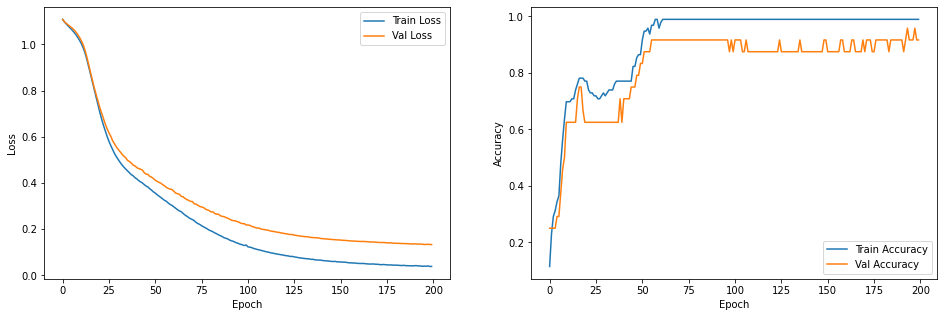

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,5))
plt.subplot(1,2,1) # 그래프 좌측 표시
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.subplot(1,2,2) # 그래프 우측 표시
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.legend()
plt.show()

In [12]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 217ms/step - loss: 0.1302 - accuracy: 1.0000


[0.1301576793193817, 1.0]